 # 1.Создание генератора картинок (основа наследованя от Dataset):

## Обращение к картинкам с фоном клеток крови из папки background 

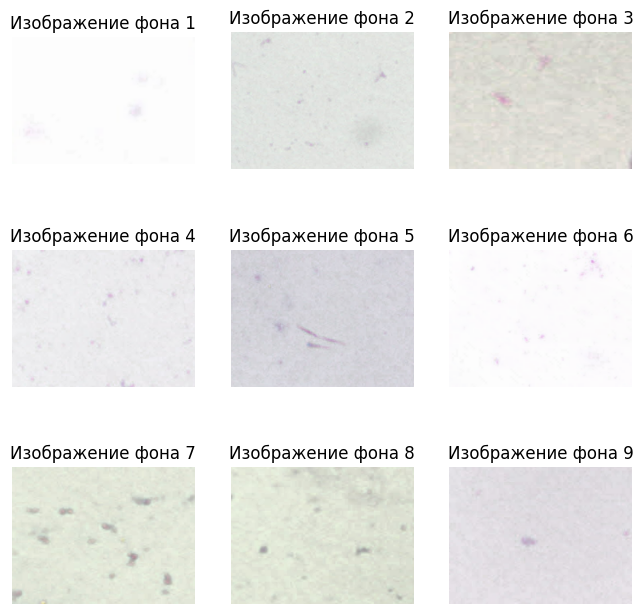

In [44]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as v2
import matplotlib.pyplot as plt
import os
from PIL import Image  


class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Директория со всеми изображениями.
            transform (callable, optional): Необязательное преобразование, применяемое
                к образцу.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, filename) for filename in os.listdir(root_dir) if filename.endswith(".png")]  # Загружаем только PNG
        self.image_paths = sorted(self.image_paths)  # Сортируем пути для поддержания согласованного порядка

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path) # Используем PIL для открытия изображения
        if self.transform:
            image = self.transform(image)
        # Поскольку у нас нет меток, давайте вернем фиктивную метку (например, 0)
        # Вам нужно будет изменить это, если у вас есть способ получить метки.
        return image, 0  # возвращаем изображение и фиктивную метку


# Определение путь к директории с изображениями
image_dir = "BCCD_my_Bloode/background"  # Замените фактическим путем
# Проверка, что директория существует.
if not os.path.exists(image_dir):
    print(f"Ошибка: Директория '{image_dir}' не найдена. Пожалуйста, проверьте путь.")
    exit()


# Определяем преобразование, которое нужно применить к изображениям.  Ключевой момент - преобразование в тензор.
transform = v2.Compose([
    v2.ToTensor()
])

# Создаем пользовательский набор данных
dataset = CustomDataset(root_dir=image_dir, transform=transform)

# Отображаем первые 9 изображений
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    if i <= len(dataset):
        img, label = dataset[i-1]  # Получаем i-е изображение (индексация с 0)
        figure.add_subplot(rows, cols, i)
        # Замените подходящими заголовками, если у вас есть метки
        plt.title(f"Изображение фона {i}")  # или labels_map[label], если бы у вас были метки
        plt.axis("off")
        plt.imshow(img.squeeze().permute(1, 2, 0), cmap="gray") # Добавлено .permute(1, 2, 0) для исправления порядка цветовых каналов для отображения
    else:
        print(f"Предупреждение: Доступно только {len(dataset)} изображений. Останавливаемся на изображении {i-1}.")
        break # Останавливаемся, если вы попытаетесь получить доступ за пределы количества доступных изображений

plt.show()




## Обращение к картинкам  клеток крови из папки bloode_cell 

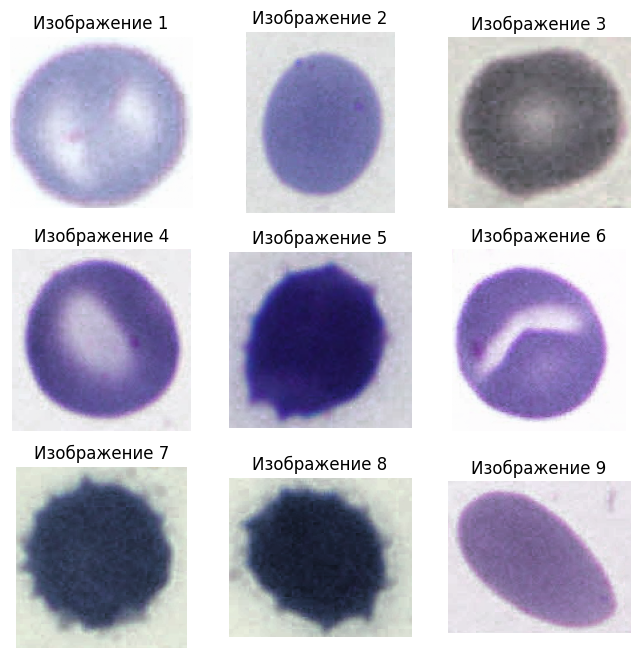

In [50]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torchvision.transforms.v2 as v2

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Директория со всеми изображениями.
            transform (callable, optional): Необязательное преобразование, применяемое
                к образцу.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, filename) for filename in os.listdir(root_dir) if filename.endswith(".png")]  # Загружаем только PNG
        self.image_paths = sorted(self.image_paths)  # Сортируем пути для поддержания согласованного порядка

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)  # Используем PIL для открытия изображения
        if self.transform:
            image = self.transform(image)
        # Поскольку у нас нет меток, давайте вернем фиктивную метку (например, 0)
        return image, 0  # возвращаем изображение и фиктивную метку


# Определение пути к директории с изображениями
image_dir = "BCCD_my_Bloode/blood_cell"  # Замените фактическим путем
# Проверка, что директория существует
if not os.path.exists(image_dir):
    print(f"Ошибка: Директория '{image_dir}' не найдена. Пожалуйста, проверьте путь.")
    exit()

# Определяем преобразование, которое нужно применить к изображениям
transform = v2.Compose([
    v2.ToTensor()
])

# Создаем пользовательский набор данных
dataset = CustomDataset(root_dir=image_dir, transform=transform)

# Отображаем первые 9 изображений
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    if i <= len(dataset):
        img, label = dataset[i - 1]  # Получаем i-е изображение (индексация с 0)
        figure.add_subplot(rows, cols, i)
        plt.title(f"Изображение {i}")
        plt.axis("off")

        # Отображение изображения в зависимости от числа каналов
        if img.shape[0] == 1:  # Одноканальное изображение
            plt.imshow(img.squeeze(), cmap="gray")
        else:  # Многоканальное изображение (например, RGB)
            plt.imshow(img.permute(1, 2, 0))
    else:
        print(f"Предупреждение: Доступно только {len(dataset)} изображений. Останавливаемся на изображении {i - 1}.")
        break  # Останавливаемся, если вы попытаетесь получить доступ за пределы количества доступных изображений

plt.show()

## Соединение клетки крови и фона

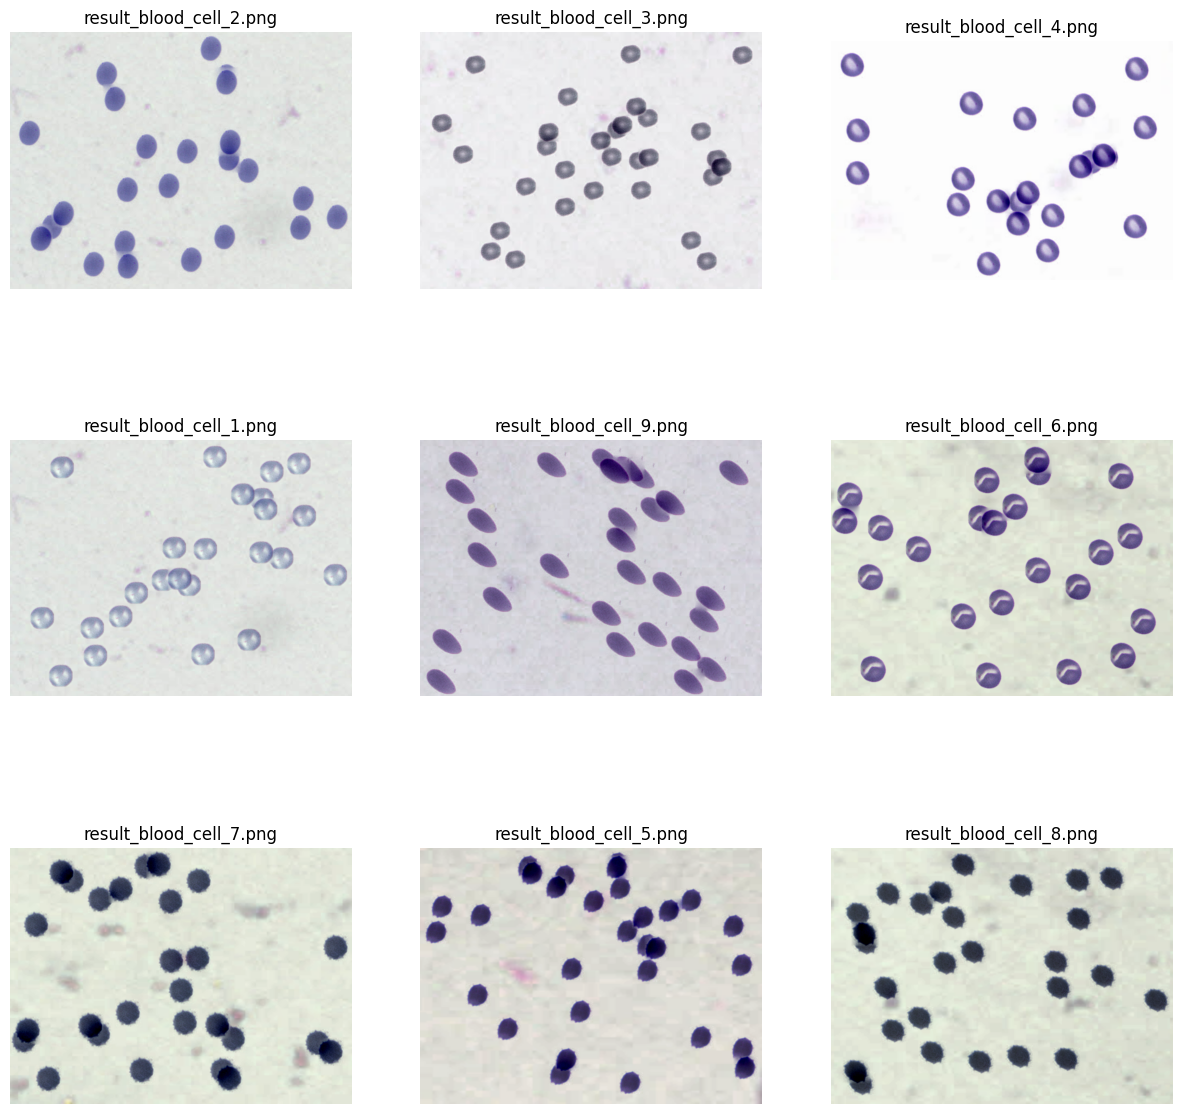

In [76]:
import os
import random
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#  пути к папкам
blood_cell_dir = 'BCCD_my_Bloode/blood_cell'
background_dir = 'BCCD_my_Bloode/background'
result_dir = 'BCCD_my_Bloode/result'

# Создаем папку result, если она не существует
os.makedirs(result_dir, exist_ok=True)

# Получаем списки файлов в папках
blood_cells = [f for f in os.listdir(blood_cell_dir) if f.endswith('.png')]
backgrounds = [f for f in os.listdir(background_dir) if f.endswith('.png')]

# Обращаемся ко всем изображениям крови
for blood_cell_img in blood_cells:
    # Открываем изображение клетки крови и конвертируйте в RGBA
    blood_cell = Image.open(os.path.join(blood_cell_dir, blood_cell_img)).convert("RGBA")

    # Преобразуем PIL изображение в OpenCV формат
    blood_cell_cv = cv2.cvtColor(np.array(blood_cell), cv2.COLOR_RGBA2BGRA)

    # Создаем маску из альфа-канала
    mask = blood_cell_cv[:, :, 3]

    # Убираем альфа-канал из изображения клетки
    blood_cell_cv = blood_cell_cv[:, :, :3]

    # Случайно выберите фоновое изображение
    background_img = random.choice(backgrounds)
    background = cv2.imread(os.path.join(background_dir, background_img))

    # Получаем размеры фона
    bg_height, bg_width = background.shape[:2]

    # Создаем новое изображение с фоном
    new_image = background.copy()

    # Случайное количество клеток крови на фоне
    num_cells = random.randint(20, 30)

    for _ in range(num_cells):
        # Случайно выбираем позицию для клетки крови
        x = random.randint(0, bg_width - blood_cell.width)
        y = random.randint(0, bg_height - blood_cell.height)

        # Вычисляем центр области для seamlessClone
        center = (x + blood_cell.width // 2, y + blood_cell.height // 2)

        # Накладываем клетку крови на фон с использованием seamlessClone
        try:
            new_image = cv2.seamlessClone(
                blood_cell_cv,
                new_image,
                mask,
                center,
                cv2.NORMAL_CLONE
            )
        except:
            # В случае ошибок (например, если область выходит за границы)
            pass

    # Сохраняем новое изображение в папке result
    result_path = os.path.join(result_dir, f'result_{blood_cell_img}')
    cv2.imwrite(result_path, new_image)

# Визуализация первых 9 результирующих изображений
result_images = [f for f in os.listdir(result_dir) if f.endswith('.png')]

# Настройка отображения изображений
plt.figure(figsize=(15, 15))
for i, img_name in enumerate(result_images[:9]):
    img_path = os.path.join(result_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертация цветов для правильного отображения
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)

plt.show()



## Клетки крови с заливкой фона

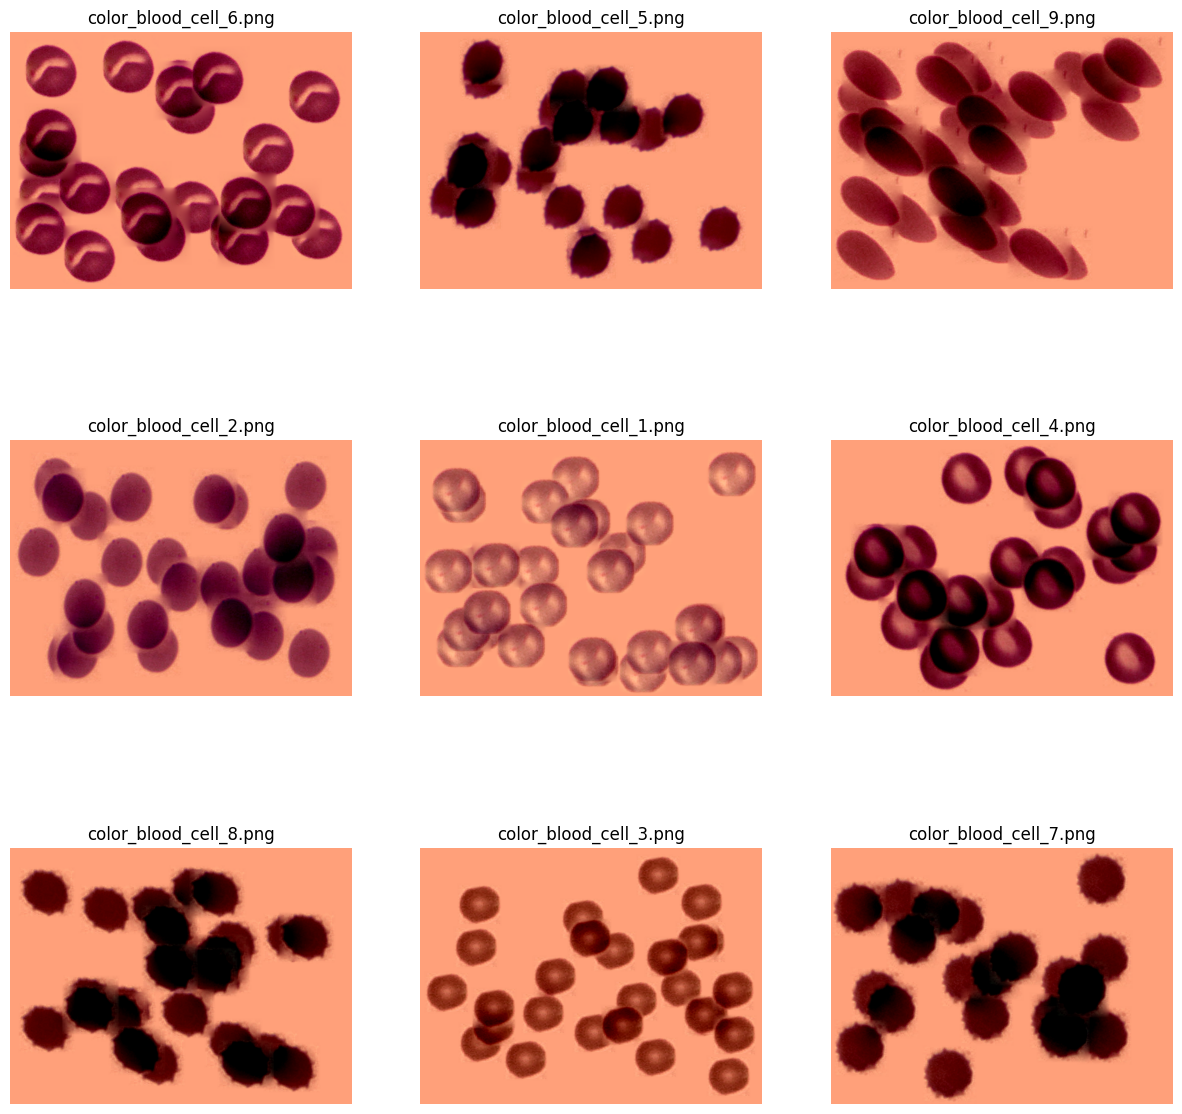

In [93]:
import os
import random
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Пути к папкам
blood_cell_dir = 'BCCD_my_Bloode/blood_cell'
background_dir = 'BCCD_my_Bloode/background'
result_dir = 'BCCD_my_Bloode/result'
background_color_dir = 'BCCD_my_Bloode/background_color'

# Создаем папки result и background_color, если они не существуют
os.makedirs(result_dir, exist_ok=True)
os.makedirs(background_color_dir, exist_ok=True)

# Получаем списки файлов в папках
blood_cells = [f for f in os.listdir(blood_cell_dir) if f.endswith('.png')]

# Цвет фона (LightSalmon)
background_color = (122, 160, 255)  # RGB значение

# Обрабатываем все изображения крови
for blood_cell_img in blood_cells:
    # Открываем изображение клетки крови и конвертируем в RGBA
    blood_cell = Image.open(os.path.join(blood_cell_dir, blood_cell_img)).convert("RGBA")

    # Преобразуем PIL изображение в OpenCV формат
    blood_cell_cv = cv2.cvtColor(np.array(blood_cell), cv2.COLOR_RGBA2BGRA)

    # Создаем маску из альфа-канала
    mask = blood_cell_cv[:, :, 3]

    # Убираем альфа-канал из изображения клетки
    blood_cell_cv = blood_cell_cv[:, :, :3]

    # Определяем размеры фона (например, 800x600)
    bg_height, bg_width = 600, 800

    # Создаем новое изображение с фоном заданного цвета
    new_image = np.full((bg_height, bg_width, 3), background_color, dtype=np.uint8)

    # Случайное количество клеток крови на фоне
    num_cells = random.randint(20, 30)

    for _ in range(num_cells):
        # Случайно выбираем позицию для клетки крови
        x = random.randint(0, bg_width - blood_cell.width)
        y = random.randint(0, bg_height - blood_cell.height)

        # Вычисляем центр области для seamlessClone
        center = (x + blood_cell.width // 2, y + blood_cell.height // 2)

        # Накладываем клетку крови на фон с использованием seamlessClone
        try:
            new_image = cv2.seamlessClone(
                blood_cell_cv,
                new_image,
                mask,
                center,
                cv2.NORMAL_CLONE
            )
        except:
            # В случае ошибок (например, если область выходит за границы)
            pass

    # Сохраняем новое изображение в папке background_color
    result_path = os.path.join(background_color_dir, f'color_{blood_cell_img}')
    cv2.imwrite(result_path, new_image)

# Визуализация первых 9 результирующих изображений
result_images = [f for f in os.listdir(background_color_dir) if f.endswith('.png')]

# Настройка отображения изображений
plt.figure(figsize=(15, 15))
for i, img_name in enumerate(result_images[:9]):
    img_path = os.path.join(background_color_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертация цветов для правильного отображения
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)

plt.show()
